# Solutions of Written Assignment 4 of 2023

### Question 7

In [3]:
def dplot(f, x0):
    d1f(x) = derivative(f, x, 1)
    d2f(x) = derivative(f, x, 2)
    d3f(x) = derivative(f, x, 3)
    
    p0 = plot(f, (x, -x0, x0), linestyle = '-', color = 'blue', axes_labels = ['$x$', '$f(x)$'])
    p1 = plot(d1f(x), (x, -x0, x0), linestyle = ':', color = 'red', axes_labels = ['$x$', '$f\'(x)$'])
    p2 = plot(d2f(x), (x, -x0, x0), linestyle = '--', color = 'green', axes_labels = ['$x$', '$f\'\'(x)$'])
    p3 = plot(d3f(x), (x, -x0, x0), linestyle = '--', color = 'green', axes_labels = ['$x$', '$f\'\'\'(x)$'])
    g = graphics_array([[p0, p1], [p2, p3]])
    return g

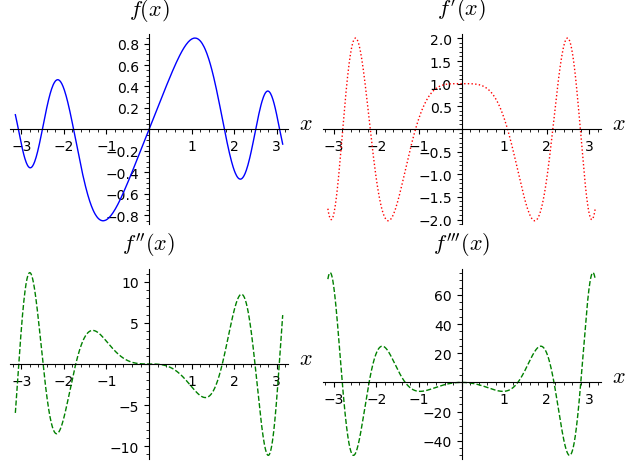

In [4]:
dplot(sin(x^2)/x, pi)

### Question 8

In [5]:
# Install the autograd packege if not installed already
try:
    import autograd
    print("Autograd is already installed.")
except:
    print("Installing autograd...")
    !pip install autograd

Autograd is already installed.


In [6]:
import autograd.numpy as np
from autograd import grad

def f(w):
    xx, yy = w
    if (xx^2 + yy^2 < 1):
        u = np.sin(xx*yy)
    else:
        u = np.sin(xx*yy)/np.sqrt(xx^2 + yy^2)
    return u

auto_grad = grad(f)

In [7]:
y = var('y')
af(x, y) = sin(x*y)*unit_step(1-x^2-y^2)+(sin(x*y)/sqrt(x^2+y^2))*unit_step(x^2+y^2-1)
analytic_grad(x, y) = af(x, y).gradient([x, y])

In [8]:
def randab(a, b):
    return (a-b)*random()+b

poi = [[n(randab(-pi, pi)), n(randab(-pi, pi))] for ii in range(10)]; poi

[[0.490418378420490, 0.551140085542407],
 [-2.56252533235850, -3.14098274743828],
 [-2.50686824610608, -3.01203333812373],
 [-2.55749249938162, 0.609202191723547],
 [-1.17656134877227, -1.03902875576168],
 [-1.27796129229625, -1.51992429624840],
 [-1.97218698760938, -3.12400448689485],
 [-0.382905945064530, 0.0860548521425559],
 [-0.358512159003373, 1.37416209545434],
 [1.96103642541026, 1.85677054575941]]

In [9]:
nppoi = [np.array(xy) for xy in poi]

gf1 = [auto_grad(xy).tolist() for xy in nppoi]
gf2 = [list(analytic_grad(xy[0], xy[1])) for xy in poi]

In [10]:
def myn(w):
    x, y = w
    return (x.n(digits = 3), y.n(digits = 3))

for ii in range(10):
    print("point", ii, "             :", poi[ii])
    print("automatic grad:", gf1[ii])
    print("analytic grad  :", gf2[ii])
    print("Distance=", sqrt((gf1[ii][0] - gf2[ii][0])^2 + (gf1[ii][1] - gf2[ii][1])^2))

point 0              : [0.490418378420490, 0.551140085542407]
automatic grad: [0.5311302338287884, 0.4726131066080259]
analytic grad  : [0.531130233828788, 0.472613106608026]
Distance= 0
point 1              : [-2.56252533235850, -3.14098274743828]
automatic grad: [0.18777956660216963, 0.1686676449790494]
analytic grad  : [0.187779566602170, 0.168667644979049]
Distance= 0
point 2              : [-2.50686824610608, -3.01203333812373]
automatic grad: [-0.18974231594318985, -0.14324042635927306]
analytic grad  : [-0.189742315943190, -0.143240426359273]
Distance= 0
point 3              : [-2.55749249938162, 0.609202191723547]
automatic grad: [-0.1377707693798083, 0.02110354465600827]
analytic grad  : [-0.137770769379808, 0.0211035446560083]
Distance= 2.86097924907640e-17
point 4              : [-1.17656134877227, -1.03902875576168]
automatic grad: [0.06002056255282978, -0.0033107023660917667]
analytic grad  : [0.0600205625528298, -0.00331070236609177]
Distance= 0
point 5              : [-1

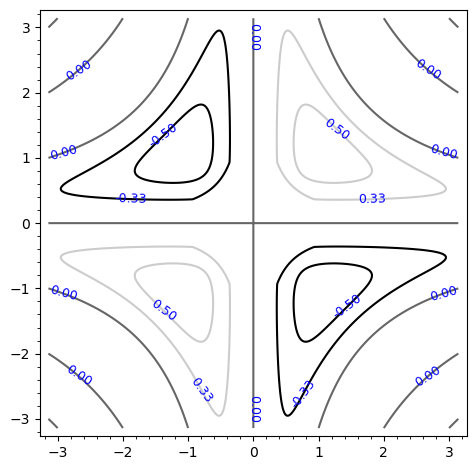

In [11]:
contour_plot(af(x, y), (x, -pi, pi), (y, -pi, pi), contours = [-1/2, -1/3, 0, 1/3, 1/2], fill = False, plot_points = 300, labels = True)

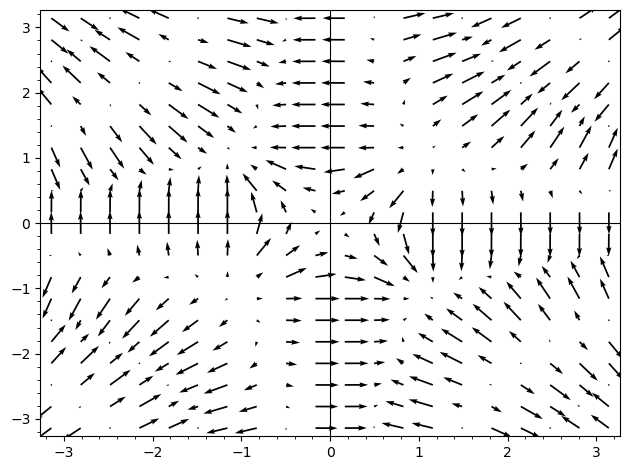

In [12]:
plot_vector_field(-analytic_grad(x, y), (x, -pi, pi), (y, -pi, pi))